In [3]:
## Importing Required Packages
import numpy as np ## To set seed for replication
import matplotlib.pyplot as plt ## To plot a histogram that approximates true PV Distribution
import scipy.stats as st ## To do random sampling
import pandas as pd ## To grab our summary statistics
np.random.seed(42)

In [2]:
def trial():
    ## Sampling from distributions in TXFD Monte Carlo Video
    i = st.norm.rvs(loc = .1,scale = .01)
    n = st.binom.rvs(n = 5,p = .75)
    K = st.expon.rvs(scale = 100)
    ## Annuity Immediate Present Value
    PV = K*(1 - (1/(1+i))**n)/i
    ## Give us the present value based on K, i and n samples
    return PV

In [36]:
def trial():
    ## Sampling from distributions in TXFD Monte Carlo Video
    g = st.norm.rvs(loc = .03,scale = .005)
    wacc = st.uniform.rvs(.06,.1)
    ## Annuity Immediate Present Value
    V = 325*(1+g)/(wacc-g)
    ## Give us the present value based on K, i and n samples
    return max(V,0)

In [37]:
## Generate 25000 sample observations
trials = []
for t in range(100000):
    trials.append(trial())
pd.Series(trials).describe()

count    100000.000000
mean       4951.167033
std        2306.505707
min        2274.468572
25%        3185.963678
50%        4181.248621
75%        6077.414679
max       25087.587995
dtype: float64

Text(0.0, 1.0, 'Empirical Probability Density of Valuations')

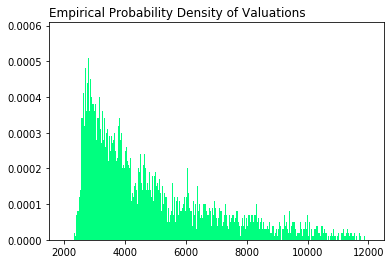

In [38]:
## Plot our histogram of observations
plt.hist(trials,bins=range(2000, 12000, 1),weights=np.zeros_like(trials) + 1. / 100000,
         color = "springgreen")
plt.title("Empirical Probability Density of Valuations", c = "black", loc = "left")

In [5]:
## Summary Stats
pd.Series(trials).describe()

count    25000.000000
mean       297.619904
std        309.592009
min          0.000000
25%         81.512199
50%        200.510310
75%        406.131236
max       3427.867674
dtype: float64

In [14]:
def downside_trial():
    avg = 0
    i = st.norm.rvs(loc = avg,scale = 1) ## some dist
    return min(0,i-avg)**2

In [17]:
downside_trials = []
for t in range(100000):
    downside_trials.append(downside_trial())
sum(downside_trials)/len(downside_trials)

0.5004117256797644

In [18]:
pd.Series(downside_trials).describe()

count    100000.000000
mean          0.500412
std           1.113995
min           0.000000
25%           0.000000
50%           0.000009
75%           0.459720
max          18.815463
dtype: float64

In [23]:
pd.Series(trials).describe()

count    100000.000000
mean       5159.324859
std        3878.296524
min     -268948.171176
25%        3190.734752
50%        4191.608594
75%        6088.188886
max      381230.936829
dtype: float64

In [34]:
list(reversed(sorted(trials)))

[695382.9424412581,
 260966.37682861605,
 255315.42688914278,
 179253.94193097297,
 166978.82615423048,
 151664.54663868604,
 136980.79788502003,
 116370.62926160182,
 108042.60511545782,
 105928.75117530324,
 84329.536914601,
 82776.22524589604,
 76359.86684041593,
 74454.15328396647,
 72642.56535392505,
 72454.36925688984,
 66524.15387487407,
 66090.78550076787,
 65907.45276460685,
 64241.50979658701,
 64165.064322234655,
 61571.8771935666,
 60510.5488176872,
 58125.64036077882,
 58122.05658970631,
 57964.91670137407,
 57109.016872887274,
 55335.591990522335,
 54660.94394233293,
 54308.19213964407,
 53853.866725859385,
 53740.89086815736,
 52964.173461263796,
 52829.68248627565,
 52774.019604922185,
 52763.741848850674,
 50315.28292396547,
 49266.45352080439,
 49164.159989058884,
 48233.56573997776,
 46994.13700585417,
 45873.28042348292,
 45464.47137736004,
 45182.21305492614,
 44729.19889806601,
 44108.873550670185,
 43055.8840540486,
 42894.45121953501,
 42722.61935010115,
 42294.

In [40]:
(round(4951.167033-1.282*2306.505707,2),round(4951.167033+1.282*2306.505707,2))

(1994.23, 7908.11)